In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import math
train = pd.read_csv('/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv')



,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [46]:
def get_radar_value(k,length):
    return round(5+(9*k)/length)

# Use Radar Chart for visualize weapons

1. Assault Rifles

In [19]:
data = train.copy()
data.head()

# let's see only Rifles
rifle = data[data['Weapon Type'] == "Assault Rifle"]

# Delete space between character
rifle.rename(columns = {"Weapon Name":"WeaponName"
                        ,"Bullet Type":"BulletType"
                       , "Magazine Capacity":"MagazineCapacity"
                       , "Bullet Speed":"BulletSpeed"
                       , "Rate of Fire":"RateOfFire"
                       , "Shots to Kill (Chest)":"ShotsToKillChest"
                       , "Shots to Kill (Head)":"ShotsToKillHead"
                       , "Damage Per Second":"DamagePerSecond"
                       , "Fire Mode":"FireMode"}, inplace = True)
rifle

# We will look at these variables in 'rifle' = damage, magazine, range, rate of fire, damage per second
rifle_new = rifle[['WeaponName', 'Damage', 'Range', 'RateOfFire', 'DamagePerSecond', 'BDMG_0']]
# rifle_new["ShotsToKill"]=rifle["ShotsToKillChest"]*0.24+0.76*rifle["ShotsToKillHead"]


def get_radar_value(k,length):
    return round(5+(9*k)/length)

# make a list of 'Damage'
damage_list = list(rifle_new['Damage'])
# delete duplication
dmg_list = []
for i in damage_list:
    if i not in dmg_list:
        dmg_list.append(i)
dmg_list.sort()
max_dmg=dmg_list[-1]
# Change 'Damage' in to 1~10
for k in range(len(dmg_list)):
    rifle_new.loc[(rifle_new.Damage == dmg_list[k]), 'Damage'] = get_radar_value(k,len(dmg_list))

    
# Range
range_list = list(rifle_new['Range'])
rg_list = []
for i in range_list:
    if i not in rg_list:
        rg_list.append(i)
rg_list.sort()
max_rg=rg_list[-1]

# change 'Range' in to 1~10
for k in range(len(rg_list)):
    rifle_new.loc[(rifle_new.Range == rg_list[k]), 'Range'] = get_radar_value(k,len(rg_list))

# Rate of Fire
rate_list = list(rifle_new['RateOfFire'])
rf_list = []
for i in rate_list:
    if i not in rf_list:
        rf_list.append(i)
rf_list.sort()
max_rf=rf_list[-1]

for k in range(len(rf_list)):
    rifle_new.loc[(rifle_new.RateOfFire == rf_list[k]), 'RateOfFire'] =  get_radar_value(k,len(rf_list))
    

# Damage Per Second
dmgPS_list = list(rifle_new['DamagePerSecond'])
dps_list = []
for i in dmgPS_list:
    if i not in dps_list:
        dps_list.append(i)
dps_list.sort()
max_dps=dps_list[-1]

for k in range(len(dps_list)):
    rifle_new.loc[(rifle_new.DamagePerSecond == dps_list[k]), 'DamagePerSecond'] = get_radar_value(k,len(dps_list))


# BDMG_0 (Body Damage
BDMG_list = list(rifle_new['BDMG_0'])
bdmg_list = []
for i in BDMG_list:
    if i not in bdmg_list:
        bdmg_list.append(i)
bdmg_list.sort()
max_bdmg=bdmg_list[-1]

for k in range(len(bdmg_list)):
    rifle_new.loc[(rifle_new.BDMG_0 == bdmg_list[k]), 'BDMG_0'] = get_radar_value(k,len(bdmg_list))


    
# Shots To Kill
# ShotsToKill_list = list(rifle_new['ShotsToKill'])
# shotstokill_list = []
# for i in ShotsToKill_list:
#     if i not in shotstokill_list:
#         shotstokill_list.append(i)
# shotstokill_list.sort()
# for k in range(len(shotstokill_list)):
#     rifle_new.loc[(rifle_new.ShotsToKill == shotstokill_list[k]), 'ShotsToKill'] = (1+k)*2

rifle_new

,WeaponName,Damage,Range,RateOfFire,DamagePerSecond,BDMG_0
0,Groza,11,5.0,7.0,13.0,10.0
1,AKM,11,5.0,5.0,9.0,10.0
2,M762,8,5.0,10.0,11.0,9.0
3,MK47 Mutant,11,8.0,5.0,9.0,12.0
4,AUG A3,5,11.0,10.0,10.0,5.0
5,SCAR-L,5,11.0,12.0,6.0,5.0
6,M416,5,11.0,10.0,10.0,5.0
7,M16A4,5,11.0,5.0,5.0,7.0
8,G36C,5,11.0,10.0,10.0,5.0
9,OBZ,5,11.0,12.0,8.0,5.0


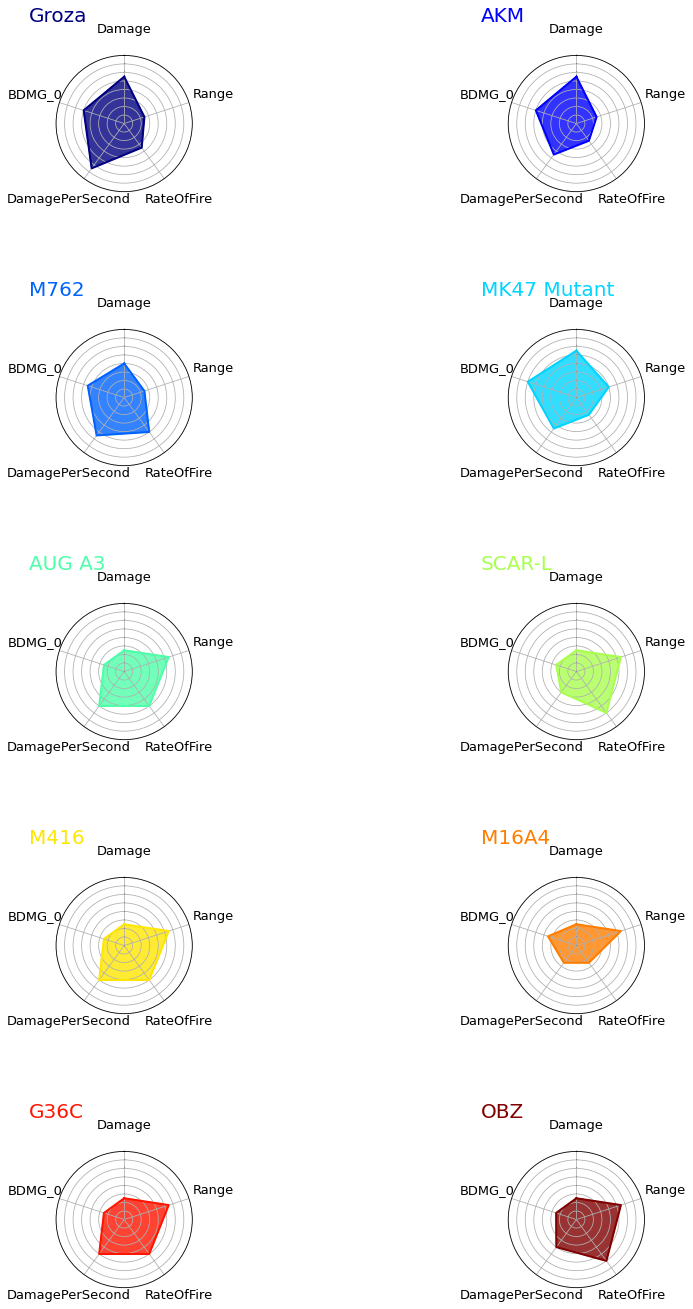

In [22]:
rifle_data = rifle_new.copy()

labels = rifle_data.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("jet", len(rifle_data.index))

fig = plt.figure(figsize = (15, 20))
fig.set_facecolor('white')

for i, row in rifle_data.iterrows():
    color = my_palette(i)
    data = rifle_data.iloc[i].drop('WeaponName').tolist()
    data += data[:1]
    
    ax = plt.subplot(5,2,i+1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = 'x', which = 'major', pad = 15)
    
    ax.set_rlabel_position(0)
    plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize = 0)
    plt.ylim(0,16)
    
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid')
    ax.fill(angles, data, color = color, alpha = 0.8)
    
    plt.title(row.WeaponName, size = 20, color=color, x=-0.2, y=1.2, ha='left')
plt.tight_layout(pad=7)
plt.show()

2. Sniper Rifles

In [52]:
data = train.copy()
data.head()

# let's see only Rifles
sniper = data[data['Weapon Type'] == "Sniper Rifle"]
sniper=sniper.reset_index()
# Delete space between character
sniper.rename(columns = {"Weapon Name":"WeaponName"
                        ,"Bullet Type":"BulletType"
                       , "Magazine Capacity":"MagazineCapacity"
                       , "Bullet Speed":"BulletSpeed"
                       , "Rate of Fire":"RateOfFire"
                       , "Shots to Kill (Chest)":"ShotsToKillChest"
                       , "Shots to Kill (Head)":"ShotsToKillHead"
                       , "Damage Per Second":"DamagePerSecond"
                       , "Fire Mode":"FireMode"}, inplace = True)

# We will look at these variables in 'rifle' = damage, magazine, range, rate of fire, damage per second
sniper_new = sniper[['WeaponName', 'Damage', 'Range', 'RateOfFire', 'DamagePerSecond', 'BDMG_0']]
# rifle_new["ShotsToKill"]=rifle["ShotsToKillChest"]*0.24+0.76*rifle["ShotsToKillHead"]




# make a list of 'Damage'
damage_list = list(sniper_new['Damage'])
# delete duplication
dmg_list = []
for i in damage_list:
    if i not in dmg_list:
        dmg_list.append(i)
dmg_list.sort()
max_dmg=dmg_list[-1]
# Change 'Damage' in to 1~10
for k in range(len(dmg_list)):
    sniper_new.loc[(sniper_new.Damage == dmg_list[k]), 'Damage'] = get_radar_value(k,len(dmg_list))

    
# Range
range_list = list(sniper_new['Range'])
rg_list = []
for i in range_list:
    if i not in rg_list:
        rg_list.append(i)
rg_list.sort()
max_rg=rg_list[-1]

# change 'Range' in to 1~10
for k in range(len(rg_list)):
    sniper_new.loc[(sniper_new.Range == rg_list[k]), 'Range'] = get_radar_value(k,len(rg_list))

# Rate of Fire
rate_list = list(sniper_new['RateOfFire'])
rf_list = []
for i in rate_list:
    if i not in rf_list:
        rf_list.append(i)
rf_list.sort()
max_rf=rf_list[-1]

for k in range(len(rf_list)):
    sniper_new.loc[(sniper_new.RateOfFire == rf_list[k]), 'RateOfFire'] =  get_radar_value(k,len(rf_list))
    

# Damage Per Second
dmgPS_list = list(sniper_new['DamagePerSecond'])
dps_list = []
for i in dmgPS_list:
    if i not in dps_list:
        dps_list.append(i)
dps_list.sort()
max_dps=dps_list[-1]

for k in range(len(dps_list)):
    sniper_new.loc[(sniper_new.DamagePerSecond == dps_list[k]), 'DamagePerSecond'] = get_radar_value(k,len(dps_list))


# BDMG_0 (Body Damage
BDMG_list = list(sniper_new['BDMG_0'])
bdmg_list = []
for i in BDMG_list:
    if i not in bdmg_list:
        bdmg_list.append(i)
bdmg_list.sort()
max_bdmg=bdmg_list[-1]

for k in range(len(bdmg_list)):
    sniper_new.loc[(sniper_new.BDMG_0 == bdmg_list[k]), 'BDMG_0'] = get_radar_value(k,len(bdmg_list))


    
# Shots To Kill
# ShotsToKill_list = list(rifle_new['ShotsToKill'])
# shotstokill_list = []
# for i in ShotsToKill_list:
#     if i not in shotstokill_list:
#         shotstokill_list.append(i)
# shotstokill_list.sort()
# for k in range(len(shotstokill_list)):
#     rifle_new.loc[(rifle_new.ShotsToKill == shotstokill_list[k]), 'ShotsToKill'] = (1+k)*2

sniper_new

,WeaponName,Damage,Range,RateOfFire,DamagePerSecond,BDMG_0
0,AWM,12,11.0,10.0,10.0,12.0
1,M24,10,8.0,7.0,7.0,7.0
2,Kar98,7,8.0,12.0,5.0,10.0
3,Win94,5,5.0,5.0,12.0,5.0


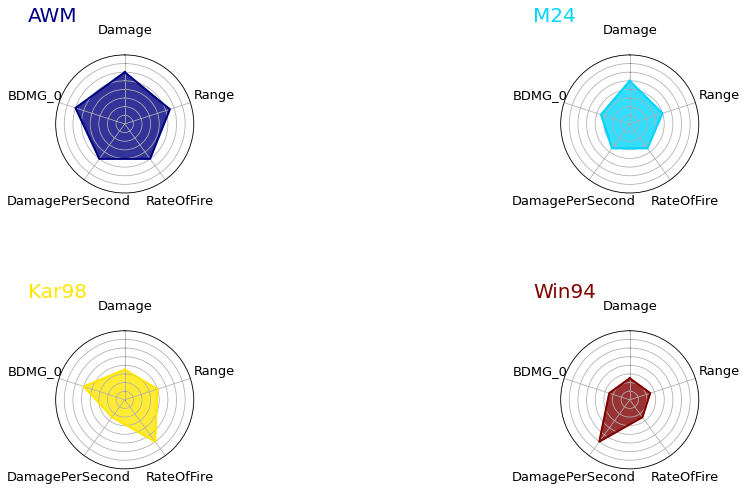

In [53]:
sniper_data = sniper_new.copy()

labels = sniper_data.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1]

my_palette = plt.cm.get_cmap("jet", len(sniper_data.index))

fig = plt.figure(figsize = (15, 20))
fig.set_facecolor('white')



for i, row in sniper_data.iterrows():
    color = my_palette(i)
    data = sniper_data.iloc[i].drop('WeaponName').tolist()
    data += data[:1]
    
    ax = plt.subplot(5,2,i+1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels, fontsize = 13)
    ax.tick_params(axis = 'x', which = 'major', pad = 15)
    
    ax.set_rlabel_position(0)
    plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16], fontsize = 0)
    plt.ylim(0,16)
    
    ax.plot(angles, data, color = color, linewidth = 2, linestyle = 'solid')
    ax.fill(angles, data, color = color, alpha = 0.8)
    
    plt.title(row.WeaponName, size = 20, color=color, x=-0.2, y=1.2, ha='left')
plt.tight_layout(pad=7)
plt.show()

In [38]:
train

,index,WeaponName,Damage,Range,RateOfFire,DamagePerSecond,BDMG_0
0,27,AWM,12,11.0,10.0,10.0,12.0
1,28,M24,10,8.0,7.0,7.0,7.0
2,29,Kar98,7,8.0,12.0,5.0,10.0
3,30,Win94,5,5.0,5.0,12.0,5.0
